# Objective: 
### Build a Logistic Regression model and deploy it using streamlit after applying EDA and Evaluating Model efficiency

# Importing Necessary Packages:

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load dataset using Pandas library**

In [234]:
# Datasets were already splitted into Training set and Testing set
df_train = pd.read_csv('Titanic_train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [235]:
df_test = pd.read_csv('Titanic_test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [236]:
# Using info() to check information on both set data
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

**As the dataset is already splitted but isn't cleaned of missing values and outliers, we will merge the datasets for it**

In [238]:
# Using Concat function, we will merge the datasets
df_merged = pd.concat([df_train,df_test], axis=0,ignore_index=True)
df_merged.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [239]:
# Information on Merged dataset shows total rows and columns along with few columns having null values
# Also columns Sibsp - Siblings and spouses and Parch - Parents and Childrens 
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


**Unique identifiers have no contributions to making the model work any better and hence we will drop any columns containing unique values**

In [241]:
df_merged.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [242]:
# We will move on to drop columns [PassengerID, Name, Ticket, Fare, Cabin]
df_merged.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace=True)
df_merged.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


## EDA - Exploratory Data Analysis

In [244]:
df_merged.info()   # Information on dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 81.9+ KB


In [245]:
df_merged.shape  # Shape of the dataset

(1309, 8)

In [246]:
# We will drop the rows which doesn't have Survived values in them as Survived is the Target column in the data

df_merged = df_merged.dropna(subset=['Survived'])
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 62.6+ KB


In [247]:
df_merged_num = df_merged.select_dtypes(include=['number'])
df_merged_num.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Missing Values - Detect and Treat

In [249]:
df_merged.isnull().sum()   # Checking null values in the dataset
# This shows Survived, Age and Embarked having null values: 418, 263 and 2 respectively

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [250]:
# Let's treat missing values of columns Age and Embarked
age_median = df_merged['Age'].median() # Mean value for Age
age_median

28.0

**Use fillna with 'Age' mean value to fill null values**

In [252]:
df_merged['Age'] = df_merged['Age'].fillna(age_median)  # Using fillna we have treated missing values in Age column

**Use fillna with mode() of 'Embarked' column**

In [254]:
Embarked_mode = df_merged['Embarked'].mode()[0]  # Mode(Frequent value) of column Embarked
Embarked_mode

'S'

In [255]:
df_merged['Embarked'] = df_merged['Embarked'].fillna(Embarked_mode)  # Using fillna we have treated missing values in Embarked column

In [256]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 62.6+ KB


In [257]:
df_merged_num = df_merged.select_dtypes(include=['number'])
df_merged_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 48.7 KB


**Have Treated the Dataset of Null values**

## Outliers - Detect and Treat

**Use IQR / Boxplot visual to detect outliers in the dataset**

In [261]:
# We will create a function to detect outliers using both methods:

def outlier(data,columns):
    outlier_range = {}

    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        Upper_bound = data[col][data[col] > Q3 + 1.5*IQR].values
        Lower_bound = data[col][data[col] < Q1 - 1.5*IQR].values

        outlier_range[col] = {'Q1': Q1,
                          'Q3': Q3,
                          'IQR': IQR,
                          'Upper_bound': Upper_bound.tolist(),
                          'Lower_bound': Lower_bound.tolist()}

    df_outlier = pd.DataFrame(outlier_range).T

    return df_outlier

In [262]:
# As Values for outliers are alot and bigger , we can set display options to maximum for better readability and viewing via pandas
pd.set_option('display.max_colwidth', None)  # Don't truncate column content
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', 1000)        # Expand width for better readability

In [263]:
outlier(df_merged,df_merged_num)

,Q1,Q3,IQR,Upper_bound,Lower_bound
Survived,0.0,1.0,1.0,[],[]
Pclass,2.0,3.0,1.0,[],[]
Age,22.0,35.0,13.0,"[58.0, 55.0, 66.0, 65.0, 59.0, 71.0, 70.5, 55.5, 61.0, 56.0, 58.0, 59.0, 62.0, 58.0, 63.0, 65.0, 61.0, 60.0, 64.0, 65.0, 56.0, 63.0, 58.0, 55.0, 71.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 57.0, 62.0, 74.0, 56.0]","[2.0, 2.0, 0.83, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 0.92, 2.0, 1.0, 1.0, 0.75, 2.0, 2.0, 2.0, 0.75, 0.67, 1.0, 0.42, 2.0, 1.0, 0.83]"
SibSp,0.0,1.0,1.0,"[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]",[]
Parch,0.0,0.0,0.0,"[1, 2, 1, 5, 1, 1, 5, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 4, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, ...]",[]
Fare,7.9104,31.0,23.0896,"[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, ...]",[]


**The above data shows few outlier values in Column Age, Sibsp and Parch, however; age is a real world value showing all sorts of people in those range,
however; we can cap from 1-2 lower bound and with families having member power upto 8 whereas Parch is a count-based feature**

## Outlier Visualization

**Using Histogram Visual to check distribution in the dataset**

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns

# Will create a loop function for easy visual-building

def histplot(data,columns):
    for col in columns:
        plt.figure(figsize=(10,5))
        sns.histplot(data[col],kde='True',color='lightblue')
        plt.xlabel(col)
        plt.title(f'Histogram of {col}')
        plt.show()

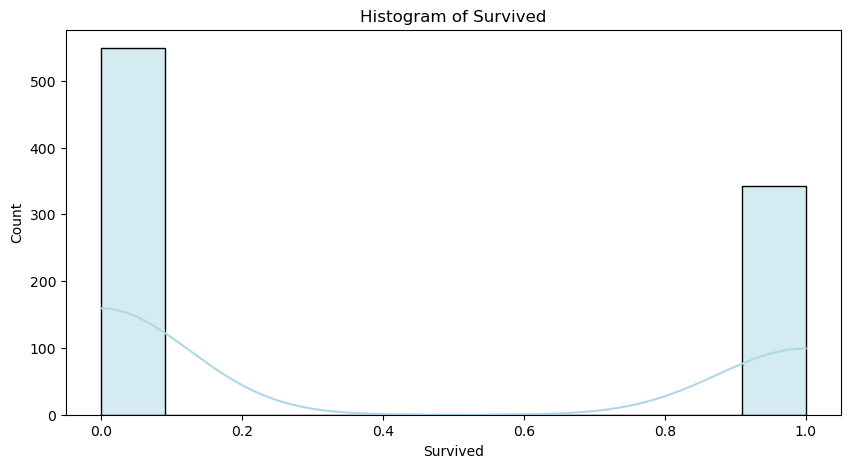

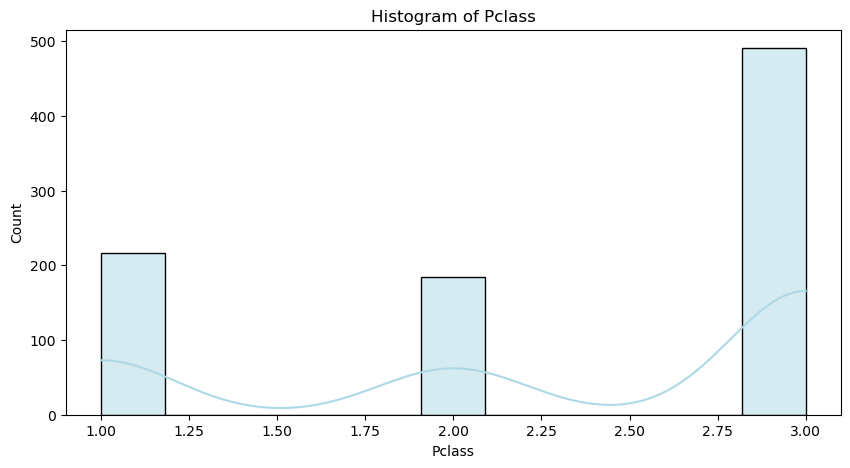

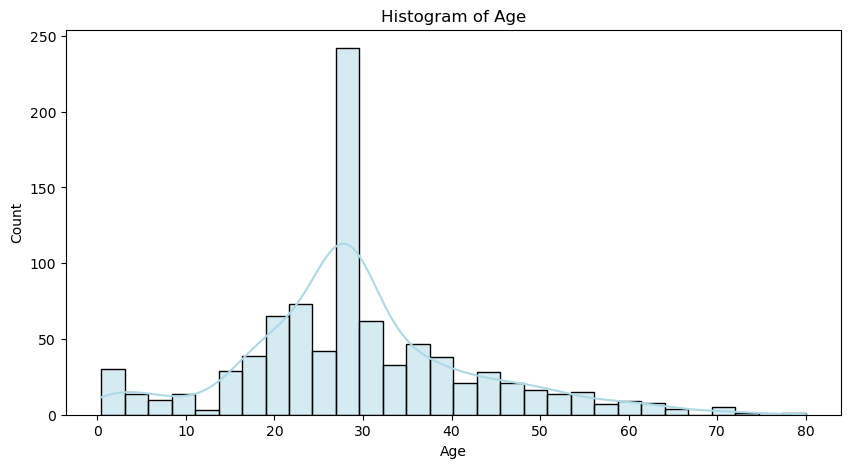

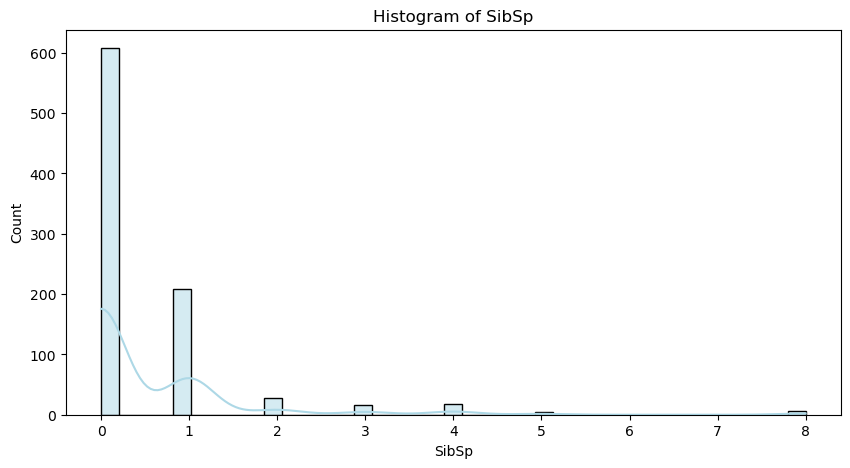

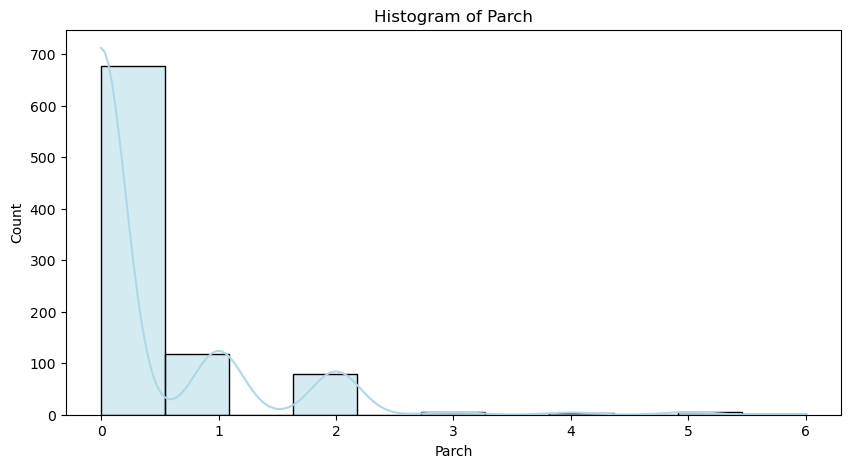

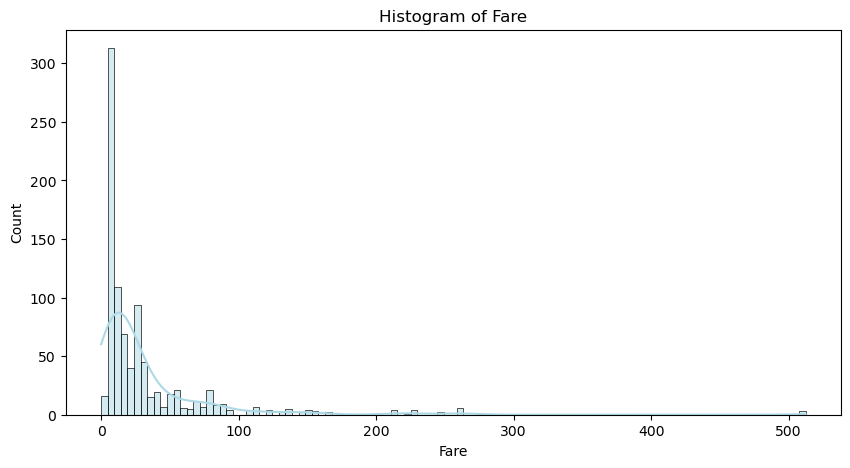

In [268]:
histplot(df_merged,df_merged_num)

## We will leave outlier values as shown above as it is:

**Real-World Validity:**

**Features like Age, SibSp (siblings/spouses), and Parch (parents/children) naturally have extreme values (e.g., large families, elderly passengers).
These are not data errors but real scenarios, so removing or transforming them may reduce important information.**

**Feature Interpretability**

**Count-based features (e.g., SibSp, Parch) lose meaning if transformed.
Example: Applying a log transformation to "3 siblings" results in log(3) = 1.1, which is not intuitive.**

## Data Visualization

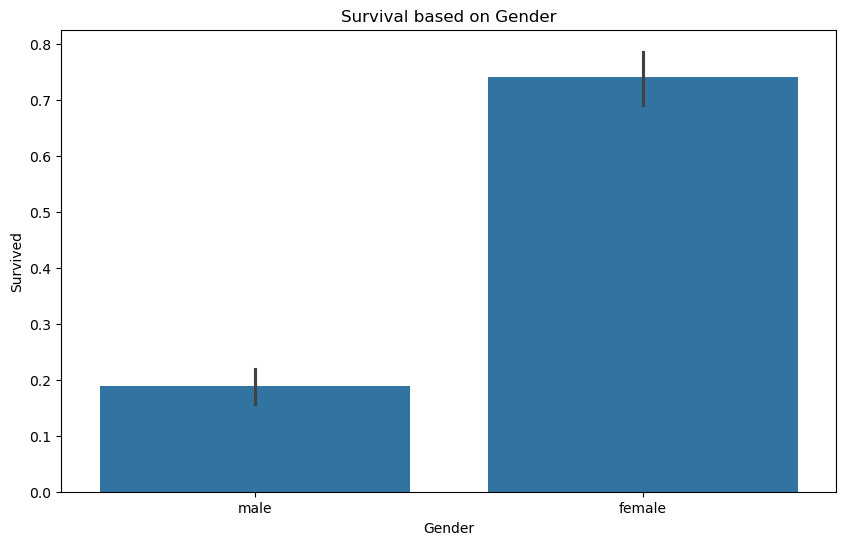

In [271]:
# Create a figure with a specified size
plt.figure(figsize=(10,6))

# Create a bar plot with 'Sex' on the x-axis and 'Survived' on the y-axis
# 'data=df_merged' specifies the DataFrame to use
sns.barplot(x='Sex', y='Survived', data=df_merged)

# Label the x-axis as 'Gender'
plt.xlabel('Gender')

# Label the y-axis as 'Survived'
plt.ylabel('Survived')

# Add a title to the plot
plt.title('Survival based on Gender')

# Display the plot
plt.show()

**The bar chart above shows more than 70% of survivors were Female**

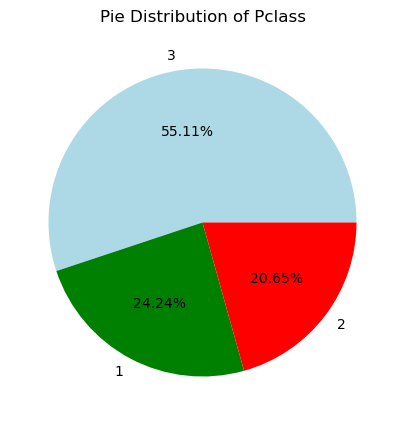

In [273]:
# Create a figure with a specified size
plt.figure(figsize=(10,5))

# Create a pie chart based on the 'Pclass' column, with labels from the 'Sex' column
# 'autopct' shows the percentage of each slice
plt.pie(df_merged['Pclass'].value_counts(),  # Use value_counts to get the distribution of Pclass
        labels=df_merged['Pclass'].value_counts().index,
        colors=['lightblue', 'green', 'red'],  # Color choices for the segments
        autopct='%1.2f%%')  # Display percentages with 2 decimal places

plt.title('Pie Distribution of Pclass')

# Display the pie chart
plt.show()

**Pie chart indicates more than 50% of travellers belong to Class - '3'**

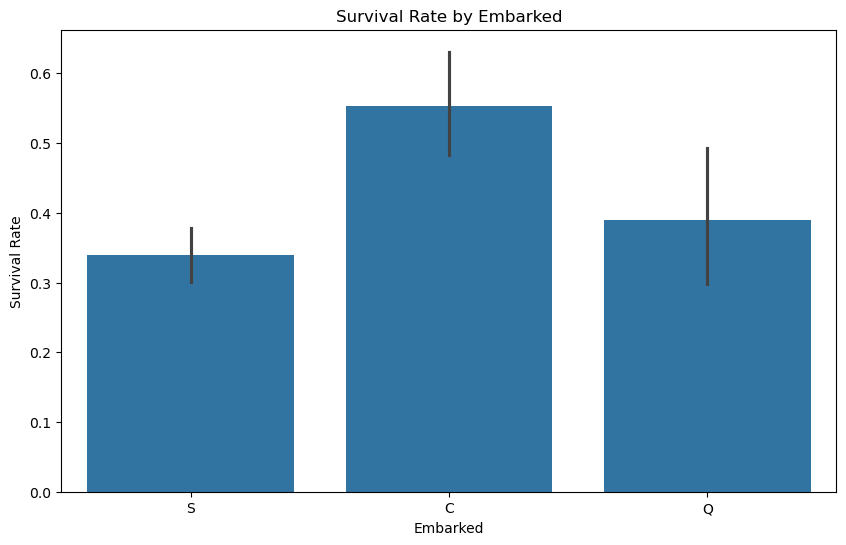

In [275]:
# Create a figure with a specified size (10 inches wide by 6 inches tall)
plt.figure(figsize=(10,6))

# Create a bar plot with 'Embarked' on the x-axis and 'Survived' on the y-axis
# 'data=df_merged' specifies that the data comes from the DataFrame 'df_merged'
sns.barplot(x='Embarked', y='Survived', data=df_merged)

# Label the x-axis as 'Embarked' (the embarkation port)
plt.xlabel('Embarked')

# Label the y-axis as 'Survival Rate' (the percentage of survivors in each port)
plt.ylabel('Survival Rate')

# Add a title to the plot
plt.title('Survival Rate by Embarked')

# Display the plot
plt.show()

**Survival Rate for Embarked - 'C' seems to be highest which means more number of survivors from embarked - 'C'**

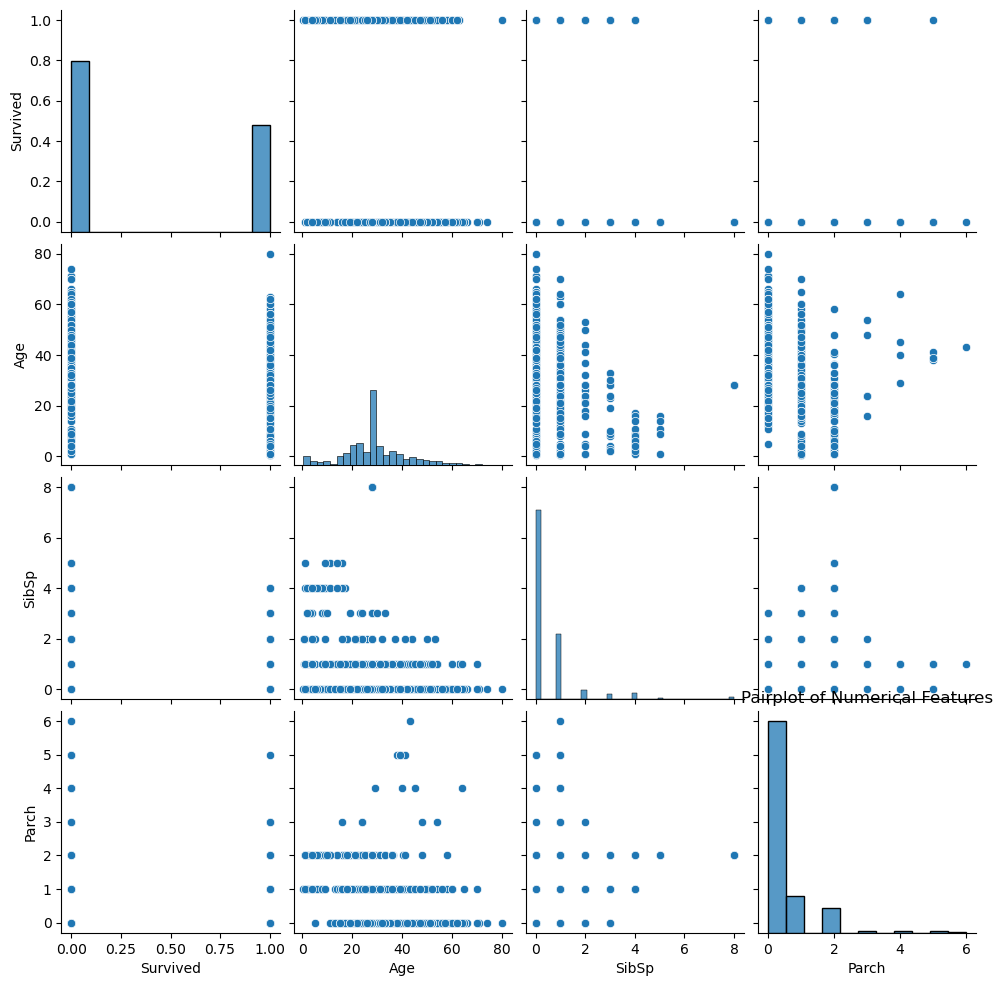

In [277]:
# Create a pairplot for the columns 'Survived', 'Age', 'SibSp', and 'Parch'
# The pairplot shows relationships between these numerical features and survival
sns.pairplot(df_merged[['Survived', 'Age', 'SibSp', 'Parch']])

# Add a title to the pairplot
plt.title('Pairplot of Numerical Features')

# Display the pairplot
plt.show()

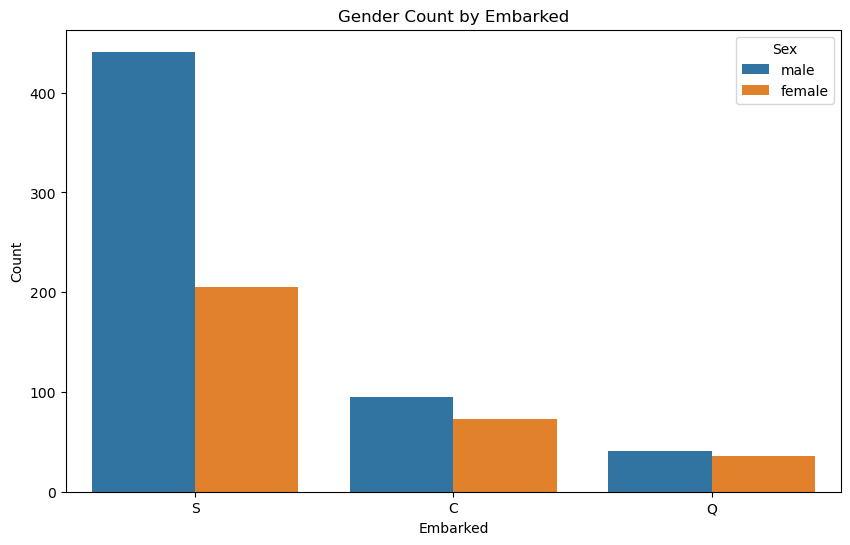

In [278]:
# Create a figure with a specified size (10 inches wide by 6 inches tall)
plt.figure(figsize=(10,6))

# Create a count plot showing the count of passengers who survived (hue='Survived') for each embarkation point ('Embarked')
# 'data=df_merged' specifies that the data is from the 'df_merged' DataFrame
sns.countplot(x='Embarked', hue='Sex', data=df_merged)

# Label the x-axis as 'Embarked' (representing the embarkation port)
plt.xlabel('Embarked')

# Label the y-axis as 'Count' (representing the number of passengers)
plt.ylabel('Count')

# Add a title to the plot
plt.title('Gender Count by Embarked')

# Display the plot
plt.show()

**Male travellers from Embarked - 'S' are highest comparative to travellers from other two embarks**`

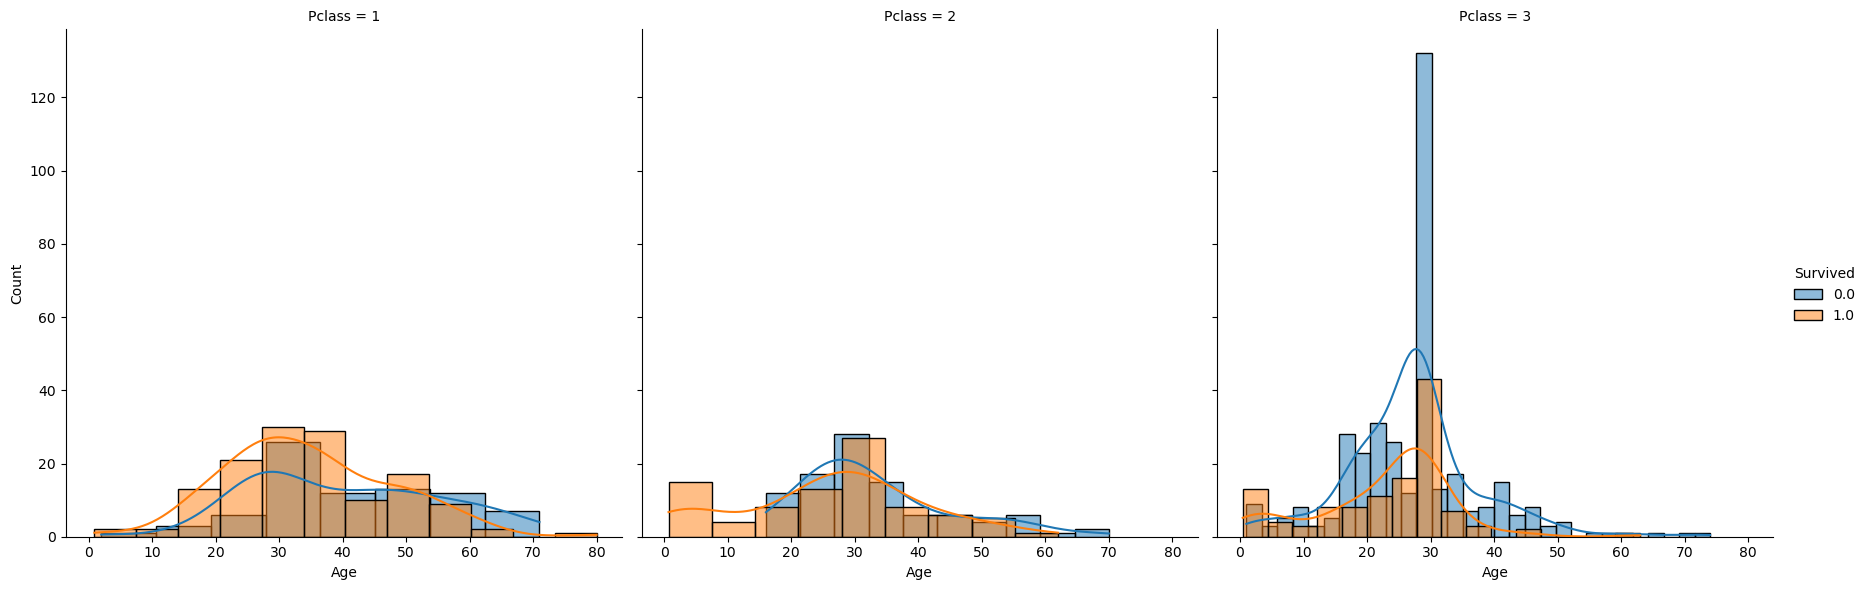

In [280]:
# Create a FacetGrid, which will create separate subplots based on 'Pclass' and color them based on 'Survived'
# The 'height=5' specifies the size of each subplot
g = sns.FacetGrid(df_merged, col="Pclass", hue="Survived", height=6)

# Map the 'sns.histplot' to the 'Age' column, with Kernel Density Estimate (KDE) to visualize the distribution
g.map(sns.histplot, 'Age', kde=True)

# Add a legend to the grid to differentiate between the 'Survived' categories
g.add_legend()

# Display the plot
plt.show()

**Class played a significant role in survival. First-class passengers had a much higher survival rate.**

**Age influenced survival rates, particularly in third-class, where younger passengers had slightly better chances than older ones.**

**Third-class had the highest concentration of passengers, but also the highest fatality rate.**

## Data preprocessing
**Checking to see feature correlation, if features need encoding, bringing features to a range of scaled data**

In [283]:
# Converting Categorical data into Numerical using encoding technique

df_merged.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


**Applying pd.dummies on category column - 'Sex' and 'Embarked'**

In [285]:
df_encoded = pd.get_dummies(df_merged, columns=['Sex', 'Embarked'], drop_first=False)

# Convert boolean columns to integers
df_encoded = df_encoded.astype(int)

# Update df_merged with the new encoded DataFrame
df_merged = df_encoded.copy()

In [286]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Survived    891 non-null    int32
 1   Pclass      891 non-null    int32
 2   Age         891 non-null    int32
 3   SibSp       891 non-null    int32
 4   Parch       891 non-null    int32
 5   Fare        891 non-null    int32
 6   Sex_female  891 non-null    int32
 7   Sex_male    891 non-null    int32
 8   Embarked_C  891 non-null    int32
 9   Embarked_Q  891 non-null    int32
 10  Embarked_S  891 non-null    int32
dtypes: int32(11)
memory usage: 45.2 KB


In [287]:
df_merged.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7,0,1,0,0,1
1,1,1,38,1,0,71,1,0,1,0,0
2,1,3,26,0,0,7,1,0,0,0,1
3,1,1,35,1,0,53,1,0,0,0,1
4,0,3,35,0,0,8,0,1,0,0,1


## Correlation of features: 

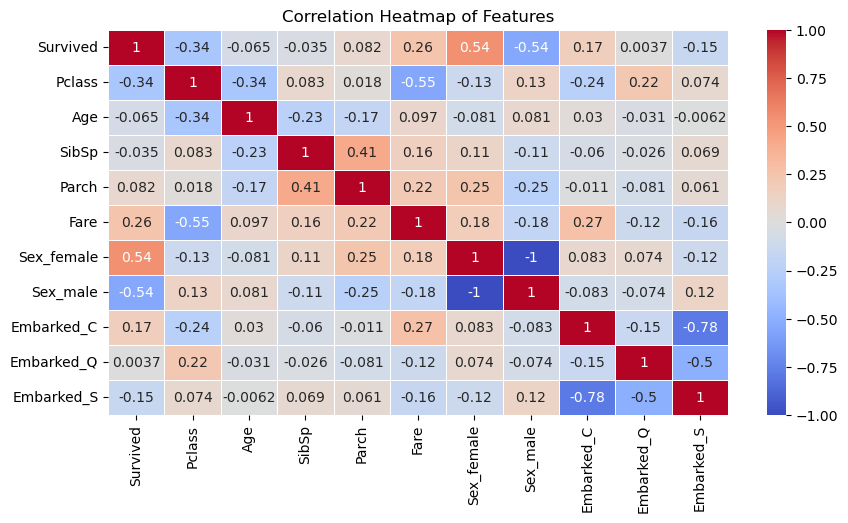

In [289]:
# Compute the correlation matrix of the dataframe
df_corr = df_merged.corr()  # Calculates correlation between all numeric columns

# Set the figure size for better visualization
plt.figure(figsize=(10,5))  # Width = 10, Height = 5

# Create a heatmap using seaborn
sns.heatmap(df_corr,  # Use the correlation matrix
            annot=True,  # Display correlation values on the heatmap
            cmap='coolwarm',  # Color theme (blue to red)
            linewidths=0.5)  # Add lines between cells for better readability

# Add a title to the heatmap
plt.title('Correlation Heatmap of Features')

# Display the heatmap
plt.show()

**The heatmap shows strong negative multicollinearity in Features - 'Embarked_S to Embarked_C' and 'Gender' as well**

## VIF - Variance Inflation Factor to check Multicollinearity

In [292]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = df_merged.columns
vif_data["VIF"] = [variance_inflation_factor(df_merged.values, i) for i in range(len(df_merged.columns))]

# Display the VIF values
print(vif_data)

       feature       VIF
0     Survived  1.660474
1       Pclass  1.920843
2          Age  1.256746
3        SibSp  1.298673
4        Parch  1.332643
5         Fare  1.653367
6   Sex_female       inf
7     Sex_male       inf
8   Embarked_C       inf
9   Embarked_Q       inf
10  Embarked_S       inf


C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [293]:
# Since there is multicollinearity between Embarked columns , also with Gender

# Drop 'Embarked_Q', 'Embarked_S', and 'Sex_male'
df_merged.drop(['Embarked_Q','Embarked_S','Sex_male'], axis=1, inplace=True)

In [294]:
df_merged['Age'] = df_merged['Age'].astype(int)

In [295]:
# Create a new feature 'WealthScore' by multiplying Pclass and Fare
df_merged['WealthScore'] = df_merged['Pclass'] * df_merged['Fare']

# Drop 'Pclass' and 'Fare' since they are now redundant
df_merged = df_merged.drop(['Pclass', 'Fare'], axis=1)

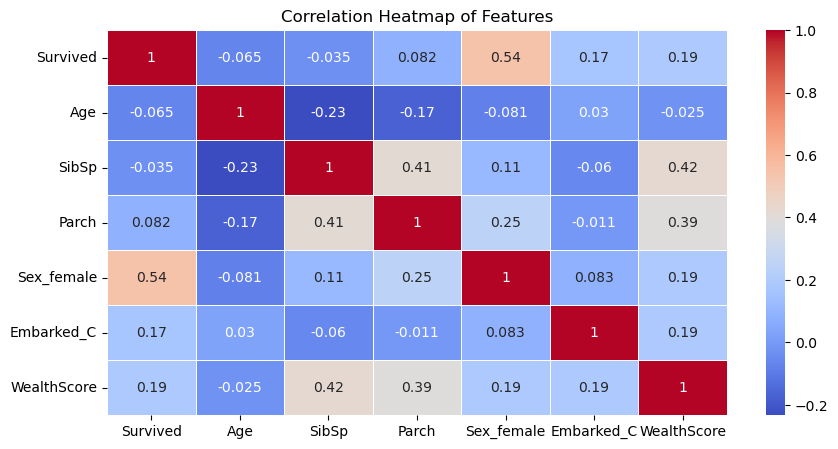

In [296]:
# Compute the correlation matrix of the dataframe
df_corr = df_merged.corr()  # Calculates correlation between all numeric columns

# Set the figure size for better visualization
plt.figure(figsize=(10,5))  # Width = 10, Height = 5

# Create a heatmap using seaborn
sns.heatmap(df_corr,  # Use the correlation matrix
            annot=True,  # Display correlation values on the heatmap
            cmap='coolwarm',  # Color theme (blue to red)
            linewidths=0.5)  # Add lines between cells for better readability

# Add a title to the heatmap
plt.title('Correlation Heatmap of Features')

# Display the heatmap
plt.show()

In [297]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Survived     891 non-null    int32
 1   Age          891 non-null    int32
 2   SibSp        891 non-null    int32
 3   Parch        891 non-null    int32
 4   Sex_female   891 non-null    int32
 5   Embarked_C   891 non-null    int32
 6   WealthScore  891 non-null    int32
dtypes: int32(7)
memory usage: 31.3 KB


In [298]:
df_merged.head()

,Survived,Age,SibSp,Parch,Sex_female,Embarked_C,WealthScore
0,0,22,1,0,0,0,21
1,1,38,1,0,1,1,71
2,1,26,0,0,1,0,21
3,1,35,1,0,1,0,53
4,0,35,0,0,0,0,24


## Model building stage:

**Model**

In [301]:
# Importing packages of Model:

from sklearn.linear_model import LogisticRegression
logi_reg = LogisticRegression()   # Calling the Model and storing inside logi_reg

**train_test_split**

In [303]:
# Importing train test split from sklearn

from sklearn.model_selection import train_test_split

# Split into X(features) and y(Target) set

X = df_merged.drop('Survived',axis=1)   # Feature
y = df_merged['Survived']  # Target

In [304]:
# Distributing into train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Feature Scaling**

In [306]:
# Import the package:

from sklearn.preprocessing import StandardScaler

# Call and store it

scaler = StandardScaler()

In [307]:
# Scaling X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Model Testing**

In [309]:
model = logi_reg.fit(X_train_scaled,y_train)   # Trained the model

In [310]:
y_pred = model.predict(X_test_scaled)    # Model Predicting on Test Data

**Model Evaluation**

In [312]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [313]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.7821
Confusion Matrix:
[[88 17]
 [22 52]]


In [314]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.7536
Recall: 0.7027
F1-Score: 0.7273


In [315]:
from sklearn.metrics import classification_report

# Generate classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



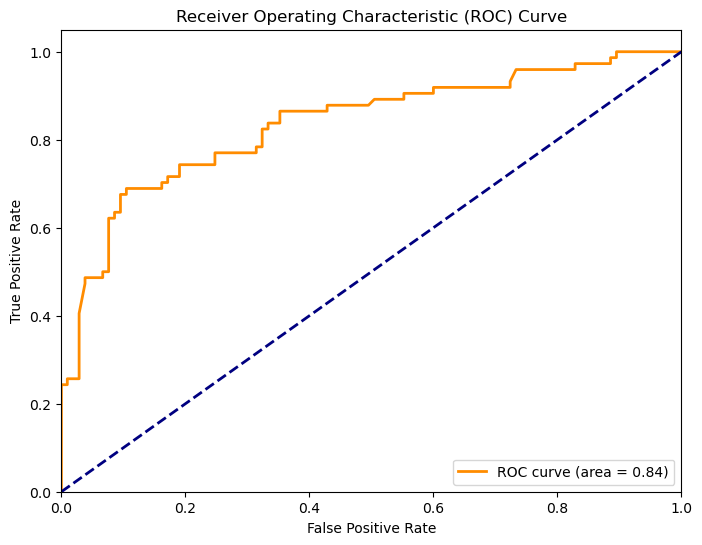

In [316]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal (no discrimination)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [317]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC score
roc_auc_score_value = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
print(f"ROC AUC Score: {roc_auc_score_value:.4f}")

ROC AUC Score: 0.8356


## Interpretation:

In [319]:
coefficients = model.coef_
print(coefficients)

[[-0.14011507 -0.47742943 -0.1872064   1.24884434  0.24016779  0.49952033]]


In [320]:
constant = model.intercept_
print(constant)

[-0.61803717]


## Test run of Model:

In [322]:
import pandas as pd
import numpy as np

# Sample inputs matching training features
sample_data = {
    'Age': [30, 40],
    'SibSp': [1, 0],
    'Parch': [0, 1],
    'Sex_female': [1, 0],  # Female, Male
    'Embarked_C': [1, 0],  # Embarked at Cherbourg (C), Not at Cherbourg
    'WealthScore': [150, 90]  # WealthScore = Pclass * Fare (for example)
}

# Convert to DataFrame
sample_df = pd.DataFrame(sample_data)

# Apply scaling (using the same scaler as used for training)
sample_df_scaled = scaler.transform(sample_df)

# Make predictions with the trained model
predictions = model.predict(sample_df_scaled)

# Check if we have a single prediction or multiple predictions
if len(predictions) == 1:
    # Single sample prediction
    print(f"Prediction: {predictions[0]} - The passenger {'survived' if predictions[0] == 1 else 'did not survive'}.")
else:
    # Multiple sample predictions
    for i, prediction in enumerate(predictions):
        print(f"Prediction for sample {i+1}: {prediction} - The passenger {'survived' if prediction == 1 else 'did not survive'}.")

Prediction for sample 1: 1 - The passenger survived.
Prediction for sample 2: 0 - The passenger did not survive.


In [323]:
import pandas as pd
import numpy as np

# Sample inputs (single or multiple rows)
sample_data = {
    'Age': [90],  # Single input (one passenger)
    'SibSp': [0],
    'Parch': [0],
    'Sex_female': [0],  # Female
    'Embarked_C': [1],  # Embarked at Cherbourg
    'WealthScore': [150]  # WealthScore = Pclass * Fare (for example)
}

# Convert to DataFrame
sample_df = pd.DataFrame(sample_data)

# Apply scaling (using the same scaler as used for training)
sample_df_scaled = scaler.transform(sample_df)

# Make predictions with the trained model
predictions = model.predict(sample_df_scaled)

# Check if we have a single prediction or multiple predictions
if len(predictions) == 1:
    # Single sample prediction
    print(f"Prediction: {predictions[0]} - The passenger {'survived' if predictions[0] == 1 else 'did not survive'}.")
else:
    # Multiple sample predictions
    for i, prediction in enumerate(predictions):
        print(f"Prediction for sample {i+1}: {prediction} - The passenger {'survived' if prediction == 1 else 'did not survive'}.")

Prediction: 0 - The passenger did not survive.


## DEPLOYMENT

In [397]:
import pickle as pk

In [399]:
model_filename = 'trained_logi_model.pkl'
scaler_filename = 'scaler.pkl'

with open(model_filename,'wb') as model_file:
    pk.dump(model,model_file)

with open(scaler_filename,'wb') as scaler_file:
    pk.dump(scaler,scaler_file)

**Will create a streamlit application for this model using VSCode**

In [405]:
X['WealthScore'].max()

512